In [1]:
from utils import *
import numpy as np
import matplotlib.pyplot as plt

map_dim = (50, 50)
# Generate some test data
nb_clusters = 10
x_set,y_set=[],[]
for i in range(nb_clusters):
  mu = np.random.uniform(10,50)
  sigma = np.random.uniform(3,10)
  x_set.append(np.random.normal(mu, sigma, 1000) )
  mu = np.random.uniform(10,50)
  sigma = np.random.uniform(3,10)
  y_set.append(np.random.normal(mu, sigma, 1000) )

#print(x_set)
#print(y_set)
x = np.concatenate(x_set)
y = np.concatenate(y_set)

heatmap, xedges, yedges = np.histogram2d(x, y, bins=map_dim)


/tmp/ipykernel_47801/829425775.py:58: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(x[i], y[i], cmap='viridis', color='#009496', s=20*p[i])


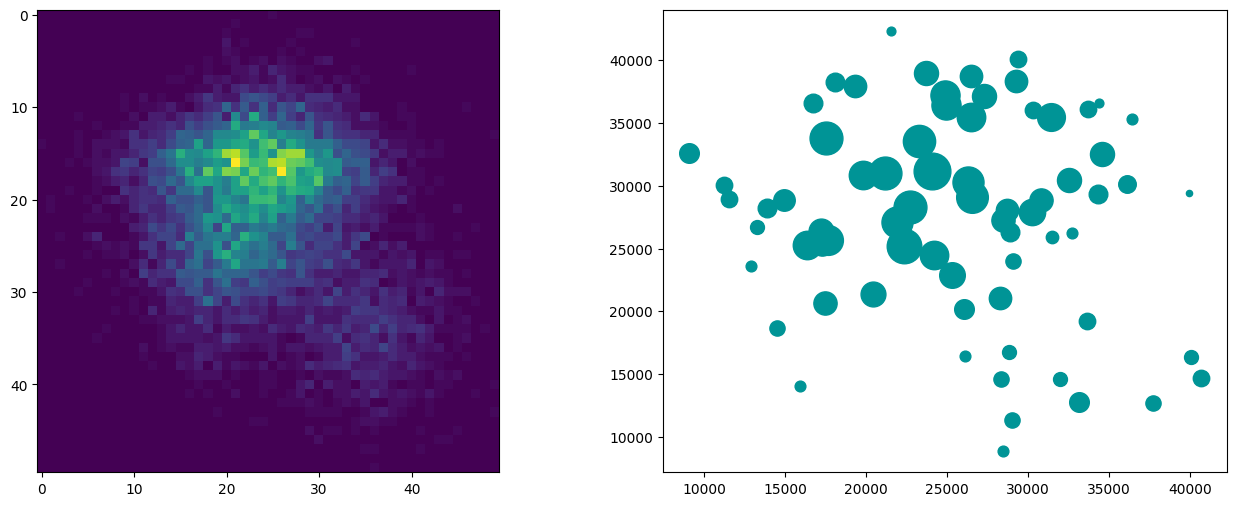

In [2]:
data_mean = np.mean(heatmap[heatmap>0])

targets = np.zeros(map_dim, dtype=int)
for i in range(1,targets.shape[0]-1,2):
  for j in range(1,targets.shape[1]-1,2):
    if (heatmap[i,j]>data_mean/2 and np.random.rand()<.5):
      i1 = i + round(np.random.uniform(-1,1))
      j1 = j + round(np.random.uniform(-1,1))
      targets[i1,j1] = heatmap[i1,j1]
    #if (targets[i-1,j]>0 or targets[i+1,j]>0 or targets[i,j-1]>0 or targets[i,j+1]>0 or 
    #    targets[i-1,j-1]>0 or targets[i+1,j-1]>0 or targets[i-1,j+1]>0 or targets[i+1,j+1]>0 ):
    #  targets[i,j] = 0

# expand map:
#heatmap = fill_map(heatmap)
#targets = fill_map(targets)

# generate targets
#targets = np.transpose(targets)

x, y, p = [],[],[]
tar2 = []
for i in range(0, targets.shape[0]):
  for j in range(0, targets.shape[1]):
    if (targets[i,j] > 0):
      #print(i,j, '->', targets[i,j])
      delta1 = round(np.random.uniform(-500,500))
      delta2 = round(np.random.uniform(-500,500))
      tar2.append( (i*1000+delta1,j*1000+delta2) )
      x.append(i*1000+delta1)
      y.append(j*1000+delta2)
      # priorities
      p.append(targets[i,j])

nb_targets = len(x)


# print and plot
#print(heatmap)
#print(targets)
#print(nb_target)
fig = plt.figure(figsize=(16, 6))
fig.add_subplot(121)
img = np.transpose(heatmap)
img = np.flip(img,0)
plt.imshow(img, origin='upper')

# plot targets
#fig = plt.figure()
#fig.set_size_inches(8, 5)
ax = fig.add_subplot(122)
ax.grid(False)
#plt.xlim([0, 50])
#plt.ylim([0, 50])


for i in range(len(x)):
  ax.scatter(x[i], y[i], cmap='viridis', color='#009496', s=20*p[i])

# save figure...